# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Preparing

### Load Data

In [2]:
# Load Data mRNA
data_mrna = 'data/data_mrna_seq_v2_rsem.txt'

mrna = pd.read_csv(data_mrna, sep="\t")

# Hapus nilai null pada kolom Hugo Symbol
mrna = mrna.dropna(subset=['Hugo_Symbol'])
mrna.reset_index(drop=True, inplace=True)

# Simpan nama-nama gen
gene_names = mrna['Hugo_Symbol'].values

# Hapus kolom Entrez_Gene_Id
mrna = mrna.drop(columns=['Entrez_Gene_Id'])

# Hapus kolom Hugo_Symbol agar hanya tersisa data ekspresi
mrna_data_only = mrna.drop(columns=['Hugo_Symbol'])

# Transpose
mrna_transposed = mrna_data_only.transpose()

# Tambahkan nama-nama gen sebagai kolom
mrna_transposed.columns = gene_names

# Reset index untuk membuat kolom 'Sample ID'
mrna_transposed.reset_index(inplace=True)
mrna_transposed = mrna_transposed.rename(columns={'index': 'Sample ID'})

mrna_transposed.head()

,Sample ID,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,TCGA-3C-AAAU-01,12.9316,52.1503,0.0000,0.0000,1.7233,0.3447,4.1359,0.6893,0.0,...,415.824,931.957,129.5920,1007.780,1658.500,258.4940,1208.370,3507.25,1894.930,1180.460
1,TCGA-3C-AALI-01,17.3790,69.7553,1.0875,0.5438,144.1000,4.8940,1.6313,0.5438,0.0,...,1161.330,965.198,59.8151,448.613,1343.120,198.4770,603.589,5504.62,1318.650,406.743
2,TCGA-3C-AALJ-01,9.2294,154.2970,0.0000,0.0000,0.0000,2.7199,2.7199,0.0000,0.0,...,305.422,2531.280,35.3581,533.998,768.812,331.8220,532.185,5458.75,942.883,509.519
3,TCGA-3C-AALK-01,11.0799,143.8640,0.4137,0.0000,0.0000,2.0687,4.5511,0.0000,0.0,...,394.506,668.597,55.0269,437.733,863.881,175.4240,607.365,5691.35,781.134,700.869
4,TCGA-4H-AAAK-01,14.4298,84.2128,0.4255,0.0000,0.4255,2.9787,2.9787,0.0000,0.0,...,405.711,674.468,48.9362,424.255,1049.790,14.0426,775.745,4041.70,831.915,881.702


### Merge Data mRNA & Klinis

In [3]:
# Load Data Klinis
data_clinical = 'data/brca_tcga_pan_can_atlas_2018_clinical_data.tsv'
clinical = pd.read_csv(data_clinical, sep="\t")

df = pd.merge(mrna_transposed, clinical[['Sample ID', 'Subtype']], on='Sample ID', how='inner')
df.head()

,Sample ID,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Subtype
0,TCGA-3C-AAAU-01,12.9316,52.1503,0.0000,0.0000,1.7233,0.3447,4.1359,0.6893,0.0,...,931.957,129.5920,1007.780,1658.500,258.4940,1208.370,3507.25,1894.930,1180.460,BRCA_LumA
1,TCGA-3C-AALI-01,17.3790,69.7553,1.0875,0.5438,144.1000,4.8940,1.6313,0.5438,0.0,...,965.198,59.8151,448.613,1343.120,198.4770,603.589,5504.62,1318.650,406.743,BRCA_Her2
2,TCGA-3C-AALJ-01,9.2294,154.2970,0.0000,0.0000,0.0000,2.7199,2.7199,0.0000,0.0,...,2531.280,35.3581,533.998,768.812,331.8220,532.185,5458.75,942.883,509.519,BRCA_LumB
3,TCGA-3C-AALK-01,11.0799,143.8640,0.4137,0.0000,0.0000,2.0687,4.5511,0.0000,0.0,...,668.597,55.0269,437.733,863.881,175.4240,607.365,5691.35,781.134,700.869,BRCA_LumA
4,TCGA-4H-AAAK-01,14.4298,84.2128,0.4255,0.0000,0.4255,2.9787,2.9787,0.0000,0.0,...,674.468,48.9362,424.255,1049.790,14.0426,775.745,4041.70,831.915,881.702,BRCA_LumA


## Precleaning for EDA

In [4]:
df.isna().sum()

Sample ID      0
UBE2Q2P2       0
HMGB1P1        0
RNU12-2P       0
SSX9P          0
            ... 
ZYG11B         0
ZYX            0
ZZEF1          0
ZZZ3           0
Subtype      101
Length: 20520, dtype: int64

In [5]:
df.dropna(inplace=True)
df.isna().sum()

Sample ID    0
UBE2Q2P2     0
HMGB1P1      0
RNU12-2P     0
SSX9P        0
            ..
ZYG11B       0
ZYX          0
ZZEF1        0
ZZZ3         0
Subtype      0
Length: 20520, dtype: int64

# Exploratory Data Analysis (EDA)

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Pisahkan fitur dan target dari DataFrame keseluruhan HANYA untuk EDA
X_eda = df.drop(columns=["Sample ID", "Subtype"])
y_eda = df["Subtype"]

scaler_eda = StandardScaler()
X_eda_scaled = scaler_eda.fit_transform(X_eda)

# Encoding label untuk pewarnaan plot
le_eda = LabelEncoder()
y_eda_enc = le_eda.fit_transform(y_eda)

### Barchart Distribusi Kelas

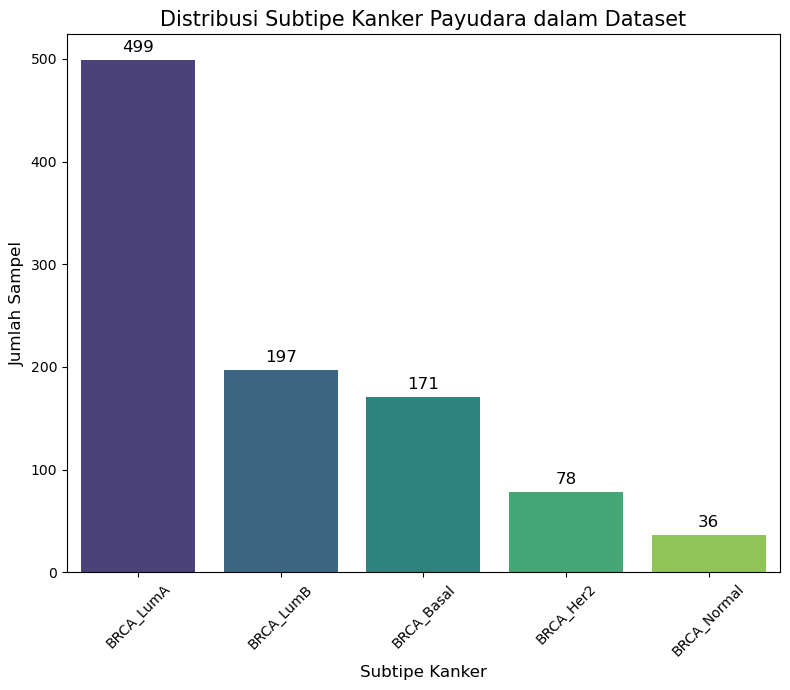


Persentase distribusi kelas Subtype:
Subtype
BRCA_LumA      50.866463
BRCA_LumB      20.081549
BRCA_Basal     17.431193
BRCA_Her2       7.951070
BRCA_Normal     3.669725
Name: proportion, dtype: float64


In [7]:
plt.figure(figsize=(8, 7))
ax = sns.countplot(data=df, x='Subtype', order = df['Subtype'].value_counts().index, palette="viridis")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()), # Posisi teks (x, y)
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=12)

plt.title('Distribusi Subtipe Kanker Payudara dalam Dataset', fontsize=15)
plt.ylabel('Jumlah Sampel', fontsize=12)
plt.xlabel('Subtipe Kanker', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distribusi_kelas_vertikal.png', dpi=300, bbox_inches='tight')
plt.show()

# Print persentase jumlah sampel per kelas
print(f"\nPersentase distribusi kelas Subtype:")
print(df['Subtype'].value_counts(normalize=True) * 100)

### Pairplot PCA

Explained variance ratio oleh 4 komponen utama: [0.08247289 0.05527786 0.03827981 0.02242689]
Total explained variance (4 komponen): 0.1985


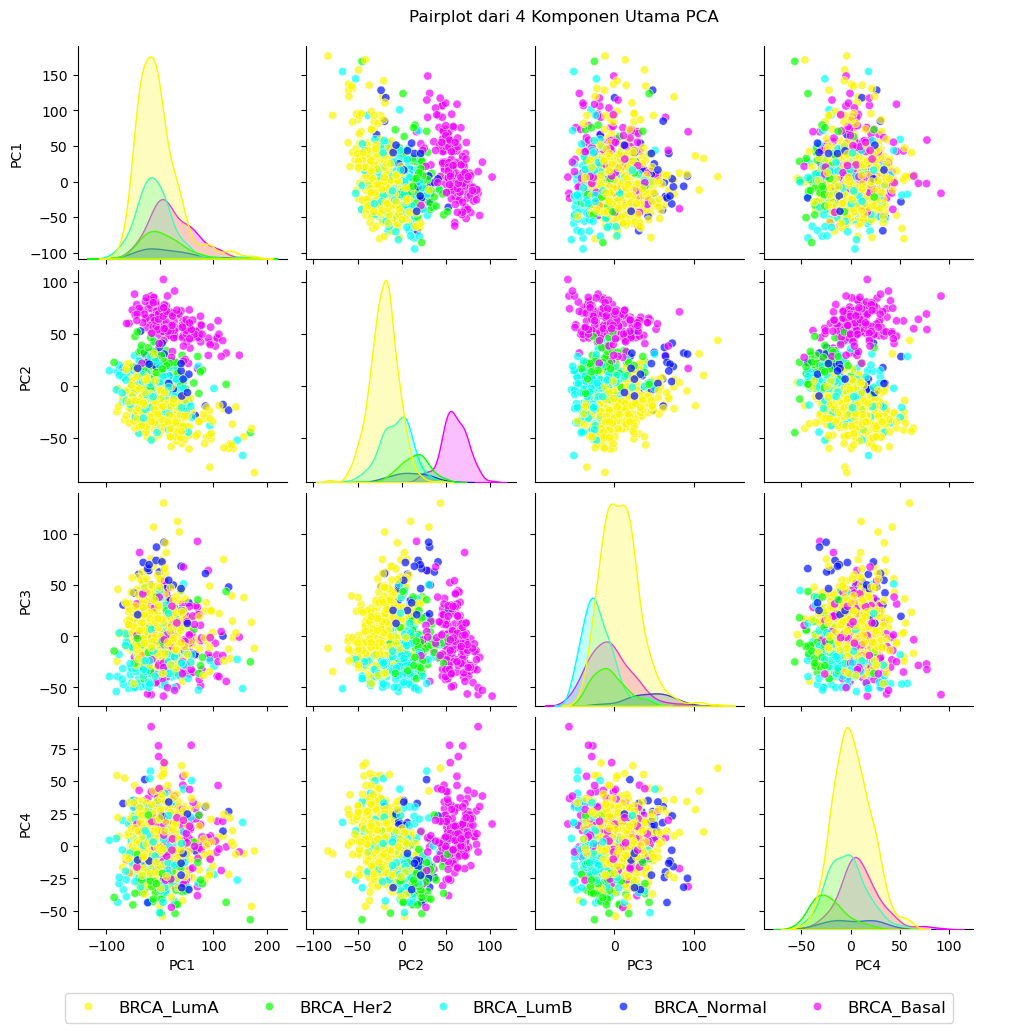

In [8]:
from sklearn.decomposition import PCA

# Reduksi dimensi dengan PCA
pca_multi = PCA(n_components=4)
X_train_pca_multi = pca_multi.fit_transform(X_eda_scaled)

pca_df_multi = pd.DataFrame(data=X_train_pca_multi, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df_multi['Subtype_Encoded'] = y_eda_enc
pca_df_multi['Subtype'] = le_eda.inverse_transform(y_eda_enc)

print(f"Explained variance ratio oleh 4 komponen utama: {pca_multi.explained_variance_ratio_}")
print(f"Total explained variance (4 komponen): {sum(pca_multi.explained_variance_ratio_):.4f}")

g = sns.pairplot(pca_df_multi, hue='Subtype', vars=['PC1', 'PC2', 'PC3', 'PC4'],
                 palette=sns.color_palette("hsv", n_colors=len(le_eda.classes_)),
                 plot_kws={'alpha': 0.7})
handles = g._legend_data.values()
labels = g._legend_data.keys()
g._legend.remove()
g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=len(le_eda.classes_), fontsize='large')
plt.subplots_adjust(bottom=0.1)
plt.suptitle('Pairplot dari 4 Komponen Utama PCA', y=1.02)
plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

#### Insight

- Dari visualisasi pairplot dengan 4 komponen di atas bisa diambil kesimpulan awal yaitu data terlihat non linear
- Walaupun begitu, PCA hanya menjelaskan 19% dari Varians Data yang masih jauh dari total ideal
- Scatter Plot masih belum bisa melihat jelas pemisahan kelas
- Maka dari itu, perlu visualisasi lebih lanjut untuk melihat hubungan kolinearitas data

### Plot Varians Kumulatif PCA

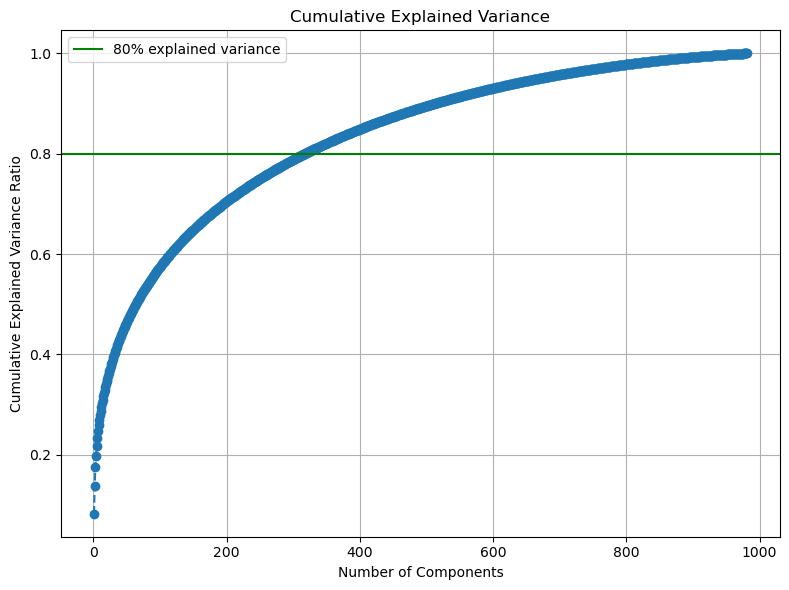

Jumlah komponen PCA yang dibutuhkan untuk menjelaskan setidaknya 80% varians: 317
--------------------------------------------------


In [9]:
pca_full = PCA(random_state=42)
pca_full.fit(X_eda_scaled)
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.8, color='g', linestyle='-', label='80% explained variance')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('variance cumulative.png', dpi=300, bbox_inches='tight')
plt.show()

n_components_80_variance = np.argmax(cumulative_explained_variance >= 0.80) + 1
print(f"Jumlah komponen PCA yang dibutuhkan untuk menjelaskan setidaknya 80% varians: {n_components_80_variance}")
print("-" * 50)

### Scatter Plot UMAP

c:\Users\Jahval Romiz\miniconda3\envs\ml-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Jahval Romiz\miniconda3\envs\ml-env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


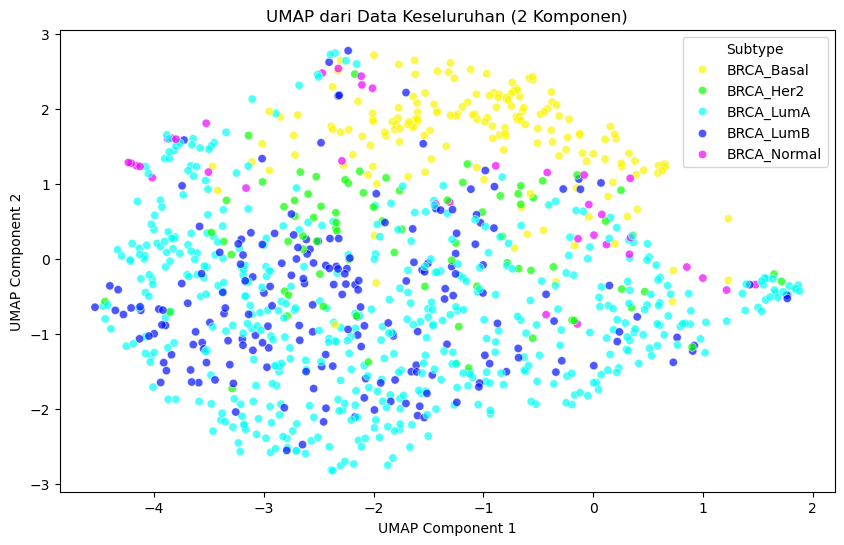

In [10]:
import umap.umap_ as umap

# Reduksi dimensi UMAP 2 komponen
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_eda_scaled)

umap_df = pd.DataFrame(data=X_umap, columns=['UMAP Component 1', 'UMAP Component 2'])
umap_df['Subtype'] = y_eda_enc

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="UMAP Component 1", y="UMAP Component 2",
    hue="Subtype",
    palette=sns.color_palette("hsv", n_colors=len(le_eda.classes_)),
    data=umap_df,
    legend="full",
    alpha=0.7
)
plt.title('UMAP dari Data Keseluruhan (2 Komponen)')

handles, labels = plt.gca().get_legend_handles_labels()
try:
    new_labels = [le_eda.classes_[int(label)] for label in labels]
    plt.legend(handles, new_labels, title="Subtype")
except ValueError:
    plt.legend(title="Subtype")
    
plt.savefig('UMAP.png', dpi=300, bbox_inches='tight')
plt.show()

#### Insight
- Dengan adanya visualisasi UMAP, bisa dilihat lebih jelas pemisahan kelas yang terdapat pada data tersebut

# Data Preprocessing

### Data Cleaning

##### Missing value

In [11]:
df.isna().sum()

Sample ID    0
UBE2Q2P2     0
HMGB1P1      0
RNU12-2P     0
SSX9P        0
            ..
ZYG11B       0
ZYX          0
ZZEF1        0
ZZZ3         0
Subtype      0
Length: 20520, dtype: int64

In [12]:
df.shape

(981, 20520)

##### Fitur Varians Rendah

In [13]:
from sklearn.feature_selection import VarianceThreshold

# Bagi Data  fitur X dan target Y
X = df.drop(columns=["Sample ID", "Subtype"])
y = df["Subtype"]

print(f"Jumlah fitur awal: {X.shape[1]}")

# VarianceThreshold untuk menghapus fitur dengan varians nol
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(X)

# Dapatkan daftar fitur yang tidak memiliki varians nol
selected_features_mask = var_thres.get_support()
X_no_zero_var = X.loc[:, selected_features_mask]

print(f"Jumlah fitur setelah menghapus varians nol: {X_no_zero_var.shape[1]}")

Jumlah fitur awal: 20518
Jumlah fitur setelah menghapus varians nol: 20218


##### Fitur Persentase Nol yang Tinggi

In [14]:
# Hapus Gen dengan >85% Nilai Nol
zero_percentage_threshold = 0.85

# Hitung persentase nilai nol untuk setiap fitur
zero_percentage = (X_no_zero_var == 0).sum() / len(X_no_zero_var)

# Identifikasi gen yang akan dipertahankan (yang persentase nol-nya DI BAWAH threshold)
features_to_keep = zero_percentage[zero_percentage < zero_percentage_threshold].index
X_cleaned = X_no_zero_var[features_to_keep]

print(f"Jumlah fitur setelah menghapus gen dengan >{int(zero_percentage_threshold*100)}% nilai nol: {X_cleaned.shape[1]}")


Jumlah fitur setelah menghapus gen dengan >85% nilai nol: 18846


### Data Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y, test_size=0.2, stratify=y, random_state=42
)

### Transformation

#### Normalization

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

### Feature Selection

##### Prefilter

In [18]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

k_best_val = 5000
selector_kbest = SelectKBest(score_func=mutual_info_classif, k=k_best_val)
X_train_kbest = selector_kbest.fit_transform(X_train_scaled, y_train_enc)
X_test_kbest = selector_kbest.transform(X_test_scaled)
print(f"Shape after SelectKBest: {X_train_kbest.shape}")

Shape after SelectKBest: (784, 5000)


Export output hasil SelectKBest ke csv

In [104]:
# Ambil fitur hasil SelectKBest
selected_features_kbest = X_train.columns[selector_kbest.get_support()]
# Ambil subset fitur terpilih
X_train_kbest_df = pd.DataFrame(X_train_kbest, columns=selected_features_kbest)
# Tambah label
X_train_kbest_df["Subtype"] = y_train.values

X_train_kbest_df

# Simpan hasil ke csv
# X_train_kbest_df.to_csv("output/hasil_SelectKBest.csv", index=False)

,EFCAB12,A2M,A2ML1,AAAS,AADAT,AAGAB,AARS,AARS2,AASS,ABAT,...,ZNRF2,ZP2,ZP4,ZSWIM4,ZSWIM5,ZSWIM6,ZWILCH,ZWINT,ZYG11A,Subtype
0,0.096330,0.345347,-0.228729,1.609571,-0.227469,-0.038608,0.206658,-0.020923,-0.162015,0.304591,...,-0.927040,-0.109529,-0.102879,0.311819,0.601023,-0.002103,-0.337622,0.384546,-0.540784,BRCA_LumA
1,0.274860,-0.469415,-0.229019,-1.026469,-0.328455,-0.165435,-0.619062,-1.344410,-1.051663,-0.127890,...,0.762685,-0.109529,-0.102879,-0.376284,-0.879428,-0.847345,-1.118165,-0.681586,-1.013991,BRCA_LumA
2,-0.237444,0.103264,-0.228602,0.253740,-0.352085,0.847732,-0.487109,-0.289427,-0.419095,0.448596,...,-0.466136,-0.109529,-0.102879,-0.481533,-0.421962,0.287339,-1.120885,-0.931610,-0.639785,BRCA_LumA
3,0.013122,-0.325832,-0.225539,1.386102,-0.434032,-0.726345,-0.896916,0.361802,-0.326896,0.497030,...,0.756640,-0.103093,-0.102879,-0.457693,-0.608424,-0.898269,-0.111260,-0.091042,1.292075,BRCA_LumA
4,-0.185158,-0.742344,-0.227606,0.948049,0.455846,0.209632,-1.314565,-1.161121,-0.334112,-0.133199,...,-0.611360,-0.109529,-0.086800,-0.047728,-0.416125,0.661421,0.432483,0.100000,-0.503005,BRCA_LumB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.909799,-0.627092,-0.225835,0.564169,-0.465617,0.365136,0.588344,0.097626,-1.264921,3.255431,...,-0.246288,-0.109529,-0.102879,-0.606178,1.431163,-0.503655,-1.244657,-0.798732,-0.627136,BRCA_LumA
780,-0.215575,-0.500323,-0.225322,-0.054955,-0.379851,0.154354,1.659822,-0.482277,-0.607922,-0.743161,...,-0.686654,-0.107074,-0.102879,0.158841,3.219458,-0.386263,1.274285,0.448312,-0.473751,BRCA_Her2
781,-0.587564,-0.173305,-0.228132,-0.086979,-0.233359,0.734220,-0.634978,0.615701,0.506695,0.704683,...,0.618163,-0.109529,-0.082683,-0.181348,1.538714,0.532766,-0.127231,-0.296627,0.022461,BRCA_LumA
782,-0.771134,1.042986,0.249507,-1.148728,-0.198535,-0.782518,-0.281114,-0.115853,-0.164558,-0.751364,...,0.240854,-0.109529,0.296733,-0.283654,-0.719632,0.216593,0.375177,-0.521121,0.389763,BRCA_Basal


##### RFE

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import time

# Menggunakan Logistic Regression L1 (Lasso) sebagai estimator
lasso = LogisticRegression(
    penalty='l1',
    solver='saga',
    max_iter=7000,
    tol=1e-4,
    multi_class='ovr',
    random_state=42,
    C=1.0,
    n_jobs=-1,
)

start_time = time.time()


rfe_lasso = RFE(estimator=lasso, n_features_to_select=250, step=200, verbose=1)
X_train_selected = rfe_lasso.fit_transform(X_train_kbest, y_train_enc)
X_test_selected = rfe_lasso.transform(X_test_kbest)


end_time = time.time()

print(f"RFE Time: {end_time - start_time:.2f} seconds")
print(f"Shape after RFE with best n_features: {X_train_selected.shape}")

Fitting estimator with 5000 features.
Fitting estimator with 4800 features.
Fitting estimator with 4600 features.
Fitting estimator with 4400 features.
Fitting estimator with 4200 features.
Fitting estimator with 4000 features.
Fitting estimator with 3800 features.
Fitting estimator with 3600 features.
Fitting estimator with 3400 features.
Fitting estimator with 3200 features.
Fitting estimator with 3000 features.
Fitting estimator with 2800 features.
Fitting estimator with 2600 features.
Fitting estimator with 2400 features.
Fitting estimator with 2200 features.
Fitting estimator with 2000 features.
Fitting estimator with 1800 features.
Fitting estimator with 1600 features.
Fitting estimator with 1400 features.
Fitting estimator with 1200 features.
Fitting estimator with 1000 features.
Fitting estimator with 800 features.
Fitting estimator with 600 features.
Fitting estimator with 400 features.
RFE Time: 2952.72 seconds
Shape after RFE with best n_features: (784, 250)


Eksport output hasil RFE-LASSO ke csv

In [102]:
# Ambil fitur hasil RFE dari hasil SelectKBest
selected_features_rfe = selected_features_kbest[rfe_lasso.get_support()]

# Dataframe hasil RFE-LASSO
X_train_rfe_df = pd.DataFrame(X_train_selected, columns=selected_features_rfe)

# Tambahkan label
X_train_rfe_df["Subtype"] = y_train.values

X_train_rfe_df

# Simpan ke file CSV
# X_train_rfe_df.to_csv("output/hasil_RFE_LASSO.csv", index=False)


,ABCC4,ABCC5,ABCG1,ABHD4,ACTN4,ACY3,ADAL,ADRA2B,AK7,AKAP9,...,UBXN2B,UFD1L,UPK2,USP40,YPEL2,ZBTB7A,ZC3H10,ZNF454,ZNF552,Subtype
0,-0.203096,-0.358167,-0.390142,1.436857,-0.202246,-0.067228,-0.172837,-0.158544,-0.064404,-0.187850,...,-0.467568,-0.725812,-0.117000,-0.906748,0.171512,0.755258,0.556681,0.528195,-0.025956,BRCA_LumA
1,-0.301193,-0.964750,-0.527498,0.315820,0.245794,-0.068247,-0.136688,-0.240775,-0.163115,-0.121493,...,0.158046,-0.483175,-0.131797,-1.037048,-0.625629,0.563446,0.797575,-0.953298,0.579090,BRCA_LumA
2,-0.107276,-0.502918,0.208351,-0.443285,-0.412110,-0.050688,0.050033,0.034607,-0.558189,-0.059285,...,-0.600850,-0.181250,-0.161284,0.703903,0.389850,0.308240,0.842618,-0.484003,3.301874,BRCA_LumA
3,-0.329476,-0.414252,0.338676,0.304915,0.802104,-0.068247,-0.051038,1.213390,-0.488470,1.592300,...,-0.656737,0.146753,-0.005304,1.126415,-0.024344,2.053209,-0.377132,-0.654681,0.786816,BRCA_LumA
4,-0.341680,1.221395,-0.000040,-0.115221,-0.885558,-0.064940,1.255093,-0.317037,-0.327995,0.204725,...,2.135629,-1.007898,-0.130365,1.456236,0.163957,-0.226342,0.203757,0.354776,0.268016,BRCA_LumB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-0.348416,-0.018429,0.956579,0.036270,-0.469003,-0.066096,-0.419758,-0.467271,-0.221416,-0.782578,...,-0.424999,-0.691837,-0.124938,0.218876,-0.621172,0.179917,0.644338,-0.787775,0.217970,BRCA_LumA
780,-0.319920,0.075485,-0.560400,1.944413,-0.075693,-0.030802,-0.426278,0.048860,6.088872,-0.795918,...,-1.182058,0.608784,-0.040878,1.705907,2.613779,-0.733011,-1.463239,-0.184683,-0.819738,BRCA_Her2
781,-0.241767,0.106024,0.468511,-0.523106,0.288544,-0.068247,-0.036261,-0.456450,-0.369066,0.658649,...,-0.303702,-1.365265,-0.163215,1.498471,0.452162,-0.286805,0.689195,-0.442553,1.459995,BRCA_LumA
782,0.733746,-0.766919,0.074357,-0.361345,-0.362336,-0.024263,-0.744989,0.124681,-0.578380,-0.149035,...,0.121454,-0.349686,-0.153344,-1.199850,-0.053570,-0.967050,-0.627836,1.106140,-1.071705,BRCA_Basal


## SMOTE

### SMOTE pada data selected

In [20]:
from imblearn.over_sampling import SMOTE

# Data yang akan digunakan untuk SMOTE dan evaluasi
X_train_for_smote = X_train_selected.copy()
X_test_for_evaluation = X_test_selected.copy()

print(f"\nDistribusi kelas sebelum SMOTE pada y_train:\n{pd.Series(y_train).value_counts()}")

# Inisialisasi SMOTE
smote_applicator = SMOTE(random_state=42, k_neighbors=3)

X_train_smote_selected, y_train_smote_selected = smote_applicator.fit_resample(X_train_for_smote, y_train)

# Tampilkan distribusi kelas setelah SMOTE
print(f"Distribusi kelas setelah SMOTE pada y_train_smote_resampled:\n{pd.Series(y_train_smote_selected).value_counts()}")
print(f"Shape X_train setelah SMOTE: {X_train_smote_selected.shape}")
print(f"Shape y_train setelah SMOTE: {y_train_smote_selected.shape}")


Distribusi kelas sebelum SMOTE pada y_train:
Subtype
BRCA_LumA      399
BRCA_LumB      157
BRCA_Basal     137
BRCA_Her2       62
BRCA_Normal     29
Name: count, dtype: int64
Distribusi kelas setelah SMOTE pada y_train_smote_resampled:
Subtype
BRCA_LumA      399
BRCA_LumB      399
BRCA_Normal    399
BRCA_Basal     399
BRCA_Her2      399
Name: count, dtype: int64
Shape X_train setelah SMOTE: (1995, 250)
Shape y_train setelah SMOTE: (1995,)


c:\Users\Jahval Romiz\miniconda3\envs\ml-env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Jahval Romiz\miniconda3\envs\ml-env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Jahval Romiz\miniconda3\envs\ml-env\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Jahval Romiz\miniconda3\envs\ml-env\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Jahval Romiz\miniconda3\envs\ml-env\lib\subprocess.py", line 1456, in _execute_child
    hp, h

Ekspor hasil SMOTE data selected

In [103]:
X_train_smote_df = pd.DataFrame(X_train_smote_selected, columns=selected_features_rfe)
X_train_smote_df["Subtype"] = y_train_smote_selected

X_train_smote_df

# Export to csv
# X_train_smote_df.to_csv("output/hasil_SMOTE_selected.csv", index=False)

,ABCC4,ABCC5,ABCG1,ABHD4,ACTN4,ACY3,ADAL,ADRA2B,AK7,AKAP9,...,UBXN2B,UFD1L,UPK2,USP40,YPEL2,ZBTB7A,ZC3H10,ZNF454,ZNF552,Subtype
0,-0.203096,-0.358167,-0.390142,1.436857,-0.202246,-0.067228,-0.172837,-0.158544,-0.064404,-0.187850,...,-0.467568,-0.725812,-0.117000,-0.906748,0.171512,0.755258,0.556681,0.528195,-0.025956,BRCA_LumA
1,-0.301193,-0.964750,-0.527498,0.315820,0.245794,-0.068247,-0.136688,-0.240775,-0.163115,-0.121493,...,0.158046,-0.483175,-0.131797,-1.037048,-0.625629,0.563446,0.797575,-0.953298,0.579090,BRCA_LumA
2,-0.107276,-0.502918,0.208351,-0.443285,-0.412110,-0.050688,0.050033,0.034607,-0.558189,-0.059285,...,-0.600850,-0.181250,-0.161284,0.703903,0.389850,0.308240,0.842618,-0.484003,3.301874,BRCA_LumA
3,-0.329476,-0.414252,0.338676,0.304915,0.802104,-0.068247,-0.051038,1.213390,-0.488470,1.592300,...,-0.656737,0.146753,-0.005304,1.126415,-0.024344,2.053209,-0.377132,-0.654681,0.786816,BRCA_LumA
4,-0.341680,1.221395,-0.000040,-0.115221,-0.885558,-0.064940,1.255093,-0.317037,-0.327995,0.204725,...,2.135629,-1.007898,-0.130365,1.456236,0.163957,-0.226342,0.203757,0.354776,0.268016,BRCA_LumB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,-0.049690,-0.479001,-0.428448,-0.623478,-0.033779,-0.043547,-0.315283,0.824754,-0.360680,-0.739197,...,0.143430,0.397341,0.025050,-1.041265,-0.405681,-0.121030,-0.668750,0.323898,-0.399767,BRCA_Normal
1991,-0.231645,-0.734123,-0.456632,1.223762,0.025338,-0.021662,-0.493362,0.369078,-0.446160,-0.998881,...,-1.020730,0.736257,-0.000048,-0.935344,-0.686552,1.808796,-0.892183,-0.378194,-0.796848,BRCA_Normal
1992,1.216135,-0.734416,-0.175237,-0.492876,0.111365,-0.044589,-0.737039,0.017022,-0.106604,-0.465887,...,-0.705260,-0.486189,-0.081099,-0.073526,0.099044,0.139061,-0.792034,0.065823,-0.976713,BRCA_Normal
1993,-0.140030,-0.622607,0.045202,-0.239577,-0.030484,-0.018418,-0.760107,0.934331,-0.372446,-0.868362,...,-0.922477,-0.185358,0.088711,-0.618977,-0.347485,1.452035,-0.421514,0.575715,-0.962318,BRCA_Normal


### SMOTE pada data full

In [21]:
print(f"\nDistribusi kelas sebelum SMOTE pada y_train (untuk data tanpa seleksi fitur kompleks):\n{pd.Series(y_train).value_counts()}")
unique_full, counts_full = np.unique(y_train, return_counts=True)
min_samples_full = counts_full.min()
k_neighbors_full = min(4, min_samples_full - 1) if min_samples_full > 1 else 1

if k_neighbors_full > 0:
    # SMOTE
    smote_full_features = SMOTE(random_state=42, k_neighbors=k_neighbors_full)
    X_train_full_smote, y_train_full_smote = smote_full_features.fit_resample(X_train_scaled, y_train)
    print(f"Distribusi kelas setelah SMOTE (untuk data tanpa seleksi fitur kompleks):\n{pd.Series(y_train_full_smote).value_counts()}")
else:
    print("Tidak bisa menerapkan SMOTE (full features). Menggunakan data training asli (scaled).")
    X_train_full_smote, y_train_full_smote = X_train_scaled, y_train


Distribusi kelas sebelum SMOTE pada y_train (untuk data tanpa seleksi fitur kompleks):
Subtype
BRCA_LumA      399
BRCA_LumB      157
BRCA_Basal     137
BRCA_Her2       62
BRCA_Normal     29
Name: count, dtype: int64
Distribusi kelas setelah SMOTE (untuk data tanpa seleksi fitur kompleks):
Subtype
BRCA_LumA      399
BRCA_LumB      399
BRCA_Normal    399
BRCA_Basal     399
BRCA_Her2      399
Name: count, dtype: int64


Ekspor hasil SMOTE tanpa seleksi

In [106]:
X_train_full_smote_df = pd.DataFrame(X_train_full_smote, columns=X_train.columns)
X_train_full_smote_df["Label"] = y_train_full_smote

X_train_full_smote_df

# Batesin kolom ke 1000
# X_train_full_smote_df.iloc[:, :1000].to_csv("output/hasil_SMOTE_full.csv", index=False)

,UBE2Q2P2,HMGB1P1,RNU12-2P,EZHIP,EFCAB8,SRP14P1,TRIM75P,HSPB1P1,ANKRD20A20P,GTPBP6,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Label
0,-0.524692,0.694540,-0.824600,-0.050414,-0.338864,0.145211,0.544871,0.133449,-0.038187,-0.668126,...,0.384546,0.691368,1.214963,-0.360412,-0.540784,-0.036686,0.381201,0.019358,-0.490056,BRCA_LumA
1,-1.296544,-0.566355,-0.824600,-0.052681,-0.710455,-0.092283,-0.559883,1.315139,-0.247945,0.096430,...,-0.681586,0.171780,-0.537035,-1.274838,-1.013991,-0.643366,1.156749,-1.354175,-1.348571,BRCA_LumA
2,-0.743869,-0.669763,-0.824600,-0.052681,-0.443617,1.954561,-0.559883,-0.449047,-0.097362,-0.231622,...,-0.931610,0.643127,-0.296998,-0.355678,-0.639785,-0.596189,-0.725844,1.303609,-0.052673,BRCA_LumA
3,-0.330406,0.582555,0.327560,-0.050739,-0.710455,3.409023,-0.559883,0.153253,-0.247945,0.502050,...,-0.091042,-0.652863,-0.484762,0.217637,1.292075,-0.445940,-0.598860,-1.021257,-0.661419,BRCA_LumA
4,0.289349,0.147994,1.357791,-0.050842,-0.107444,-0.024538,3.921574,0.233446,-0.247945,-0.851940,...,0.100000,-0.428957,0.069968,1.436211,-0.503005,-0.449457,-0.855737,-0.532666,-0.864386,BRCA_LumB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,-0.585264,-0.418893,-0.824600,-0.041722,-0.222186,-0.905985,-0.559883,-0.417165,0.082781,-0.173540,...,-0.391091,-0.886334,-0.865925,-1.282538,-0.435799,-0.340743,1.991212,0.018707,-0.540436,BRCA_Normal
1991,0.049723,0.002056,-0.824600,-0.048104,-0.447400,0.497198,1.004074,-0.530757,-0.247945,-0.466855,...,-0.708374,0.056082,-0.242808,-0.048593,-0.488516,1.159901,0.760163,0.328909,0.744508,BRCA_Normal
1992,-0.755900,-0.571894,-0.824600,-0.052681,-0.517435,0.536679,-0.559883,-0.254679,-0.175321,-0.269360,...,-0.979490,0.239793,-0.361845,-0.533492,-0.449566,0.657996,1.736671,0.820869,-0.145225,BRCA_Normal
1993,-0.249658,-0.728401,-0.722389,-0.052681,-0.463577,0.752070,-0.559883,-0.418467,-0.001130,-0.162068,...,-0.261971,-1.019204,-0.827147,-1.128322,-0.915598,-0.467069,1.240209,-0.271345,-0.177255,BRCA_Normal


# Modelling & Evaluation

In [ ]:
import time
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Inisialisasi Function untuk GridSearchCV dan Evaluasi
def run_grid_search_and_evaluate(estimator, param_grid, X_train_data, y_train_data, X_test_data, y_test_data, model_name_str, label_encoder_obj): 
    
    # GridSearchCV  
    start_time = time.time()
    cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=cv_strategy)
    grid_search.fit(X_train_data, y_train_data) 
    end_time = time.time()
    print(f"{model_name_str} GridSearchCV training time: {end_time - start_time:.2f} seconds")
    
    # Print best parameters
    best_model_from_grid = grid_search.best_estimator_
    print(f"\nBest Parameters for {model_name_str}: {grid_search.best_params_}")
    
    # Simpan hasil hyperparameter tuning
    cv_results_df = pd.DataFrame(grid_search.cv_results_)
    
    # Prediksi data test
    y_pred_on_test = best_model_from_grid.predict(X_test_data)
    # Prediksi probabilitas ROC AUC
    y_pred_proba_on_test = best_model_from_grid.predict_proba(X_test_data)
    
    # Metrik evaluasi
    acc_on_test = accuracy_score(y_test_data, y_pred_on_test)
    prec_on_test = precision_score(y_test_data, y_pred_on_test, average='macro', zero_division=0)
    rec_on_test = recall_score(y_test_data, y_pred_on_test, average='macro', zero_division=0)
    f1_on_test = f1_score(y_test_data, y_pred_on_test, average='macro', zero_division=0)
    roc_auc_on_test = roc_auc_score(y_test_data, y_pred_proba_on_test, multi_class='ovr', average='macro')
    
    # Print evaluation metrics
    print(f"\n=== Evaluation on Test Set for {model_name_str} === ")
    print(f"Accuracy: {acc_on_test:.4f}")
    print(f"Precision (Macro): {prec_on_test:.4f}")
    print(f"Recall (Macro): {rec_on_test:.4f}")
    print(f"F1-score (Macro): {f1_on_test:.4f}")
    print(f"ROC AUC (Macro, OvR): {roc_auc_on_test:.4f}")
    
    # Classification Report
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test_data, y_pred_on_test, target_names=label_encoder_obj.classes_, zero_division=0))

    return best_model_from_grid, acc_on_test, prec_on_test, rec_on_test, f1_on_test, roc_auc_on_test, cv_results_df

In [23]:
from sklearn.metrics import confusion_matrix

# Fungsi Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    
    plt.title(title, fontsize=15)
    plt.ylabel('Kelas Aktual (True Label)', fontsize=12)
    plt.xlabel('Kelas Prediksi (Predicted Label)', fontsize=12)
    plt.show()

### Random Forest Tanpa Seleksi + SMOTE

In [ ]:
# Parameter
rf_params_full = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

# Best Params
# rf_params_full = {
#     'n_estimators': [200],
#     'max_depth': [20],
#     'min_samples_split': [10],
#     'min_samples_leaf': [1],
#     'max_features': ['sqrt']
# }

rf_model_full = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# Run GridSearchCV dan Evaluasi untuk Random Forest dengan Fitur Penuh
print("\n--- Random Forest (Full Scaled Features + SMOTE) ---")
best_rf_model_full, acc_rf_metric_full, prec_rf_metric_full, rec_rf_metric_full, f1_rf_metric_full, roc_auc_rf_metric_full, cv_results_rf_full = run_grid_search_and_evaluate(
    rf_model_full, rf_params_full,
    X_train_full_smote, y_train_full_smote,
    X_test_scaled, y_test,
    "Random Forest (Full Scaled Features, SMOTE)", le
)


--- Random Forest (Full Scaled Features + SMOTE) ---
Random Forest (Full Scaled Features, SMOTE) GridSearchCV training time: 12.15 seconds

Best Parameters for Random Forest (Full Scaled Features, SMOTE): {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

=== Evaluation on Test Set for Random Forest (Full Scaled Features, SMOTE) === 
Accuracy: 0.8934
Precision (Macro): 0.9168
Recall (Macro): 0.7681
F1-score (Macro): 0.8004
ROC AUC (Macro, OvR): 0.9844

Classification Report (Test Set):
              precision    recall  f1-score   support

  BRCA_Basal       0.97      1.00      0.99        34
   BRCA_Her2       0.92      0.75      0.83        16
   BRCA_LumA       0.91      0.93      0.92       100
   BRCA_LumB       0.78      0.88      0.82        40
 BRCA_Normal       1.00      0.29      0.44         7

    accuracy                           0.89       197
   macro avg       0.92      0.77      0.80       197
weighted avg 

In [26]:
relevant_columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
print(f"\nDetail Hasil Hyperparameter Tuning untuk:")
print(cv_results_rf_full[relevant_columns].sort_values(by='rank_test_score').head(10))


Detail Hasil Hyperparameter Tuning untuk:
                                              params  mean_test_score  \
0  {'max_depth': 20, 'max_features': 'sqrt', 'min...         0.974353   

   std_test_score  rank_test_score  
0         0.00245                1  



--- Menampilkan Confusion Matrix untuk RF FULL ---


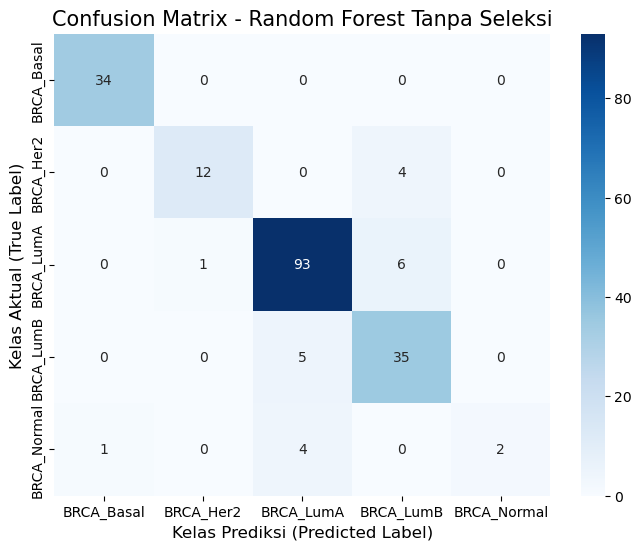

In [27]:
print("\n--- Menampilkan Confusion Matrix untuk RF FULL ---")

# Get prediksi dari model
y_pred_rf_selected = best_rf_model_full.predict(X_test_scaled)

# Panggil fungsi plot_confusion_matrix
plot_confusion_matrix(y_test, 
                      y_pred_rf_selected, 
                      le.classes_, 
                      'Confusion Matrix - Random Forest Tanpa Seleksi')

### SVM Tanpa Seleksi + SMOTE

In [ ]:
# Parameter
svm_params_full = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3]
 }

#Best Params
# svm_params_full = {
#     'C': [0.1],
#     'kernel': ['linear'],
#     'gamma': ['scale'],
#     'degree': [2]
#  }
svm_model_full = SVC(probability=True, random_state=42, class_weight='balanced')

# Run GridSearchCV dan Evaluasi untuk SVM dengan Fitur Penuh
print("\n--- SVM (Full Scaled Features + SMOTE) ---")
best_svm_model_full, acc_svm_metric_full, prec_svm_metric_full, rec_svm_metric_full, f1_svm_metric_full, roc_auc_svm_metric_full, cv_results__full = run_grid_search_and_evaluate(
    svm_model_full, svm_params_full,
    X_train_full_smote, y_train_full_smote,
    X_test_scaled, y_test,
    "SVM (Full Scaled Features, SMOTE)", le
)


--- SVM (Full Scaled Features + SMOTE) ---
SVM (Full Scaled Features, SMOTE) GridSearchCV training time: 214.85 seconds

Best Parameters for SVM (Full Scaled Features, SMOTE): {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

=== Evaluation on Test Set for SVM (Full Scaled Features, SMOTE) === 
Accuracy: 0.8782
Precision (Macro): 0.8705
Recall (Macro): 0.8048
F1-score (Macro): 0.8323
ROC AUC (Macro, OvR): 0.9730

Classification Report (Test Set):
              precision    recall  f1-score   support

  BRCA_Basal       1.00      1.00      1.00        34
   BRCA_Her2       0.87      0.81      0.84        16
   BRCA_LumA       0.86      0.94      0.90       100
   BRCA_LumB       0.82      0.70      0.76        40
 BRCA_Normal       0.80      0.57      0.67         7

    accuracy                           0.88       197
   macro avg       0.87      0.80      0.83       197
weighted avg       0.88      0.88      0.87       197




--- Menampilkan Confusion Matrix untuk RF FULL ---


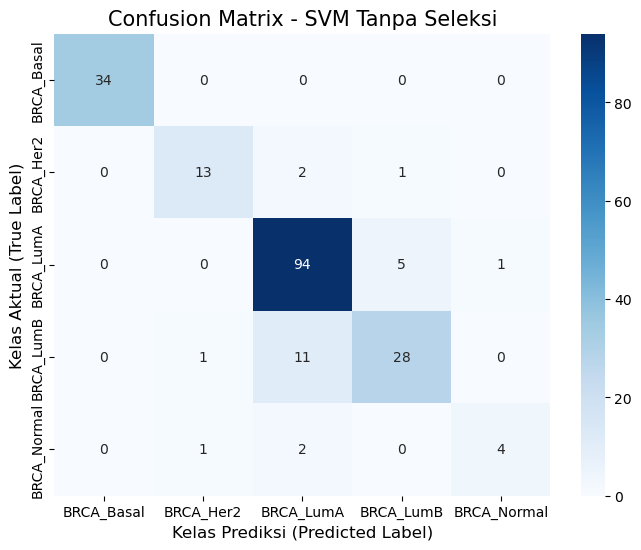

In [29]:
print("\n--- Menampilkan Confusion Matrix untuk RF FULL ---")

# Get prediksi dari model
y_pred_rf_selected = best_svm_model_full.predict(X_test_scaled)

# Panggil fungsi plot_confusion_matrix
plot_confusion_matrix(y_test, 
                      y_pred_rf_selected, 
                      le.classes_, 
                      'Confusion Matrix - SVM Tanpa Seleksi')

### Random Forest Seleksi Fitur + SMOTE

In [ ]:
if X_train_smote_selected.shape[1] > 0:
    # Parameter
    rf_params_selected = {
        'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 8]
    }
    
    # Best Params
    # rf_params_selected = {
    #     'n_estimators': [500],
    #     'max_depth': [None],
    #     'min_samples_split': [2],
    #     'min_samples_leaf': [1]
    # }
    
    rf_model_selected = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

    # Run GridSearchCV dan evaluasi untuk Random Forest dengan fitur terpilih
    print("\n--- Random Forest (Selected Features + SMOTE) ---")
    best_rf_model_selected, acc_rf_metric_selected, prec_rf_metric_selected, rec_rf_metric_selected, f1_rf_metric_selected, roc_auc_rf_metric_selected, cv_results_rf_selected = run_grid_search_and_evaluate(
        rf_model_selected, rf_params_selected,
        X_train_smote_selected, y_train_smote_selected,
        X_test_selected, y_test,
        "Random Forest (Selected Features, SMOTE)", le
    )
else:
    print("Tidak ada fitur yang terpilih untuk Random Forest (Selected Features), evaluasi dilewati.")
    # Inisialisasi metrik jika evaluasi dilewati
    acc_rf_metric_selected, prec_rf_metric_selected, rec_rf_metric_selected, f1_rf_metric_selected, roc_auc_rf_metric_selected, cv_results_rf_selected = 0,0,0,0,0


--- Random Forest (Selected Features + SMOTE) ---
Random Forest (Selected Features, SMOTE) GridSearchCV training time: 5.60 seconds

Best Parameters for Random Forest (Selected Features, SMOTE): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

=== Evaluation on Test Set for Random Forest (Selected Features, SMOTE) === 
Accuracy: 0.9137
Precision (Macro): 0.9417
Recall (Macro): 0.8559
F1-score (Macro): 0.8899
ROC AUC (Macro, OvR): 0.9845

Classification Report (Test Set):
              precision    recall  f1-score   support

  BRCA_Basal       1.00      1.00      1.00        34
   BRCA_Her2       1.00      0.75      0.86        16
   BRCA_LumA       0.93      0.94      0.94       100
   BRCA_LumB       0.78      0.88      0.82        40
 BRCA_Normal       1.00      0.71      0.83         7

    accuracy                           0.91       197
   macro avg       0.94      0.86      0.89       197
weighted avg       0.92      0.91      0.91      


--- Menampilkan Confusion Matrix untuk RF Selected ---


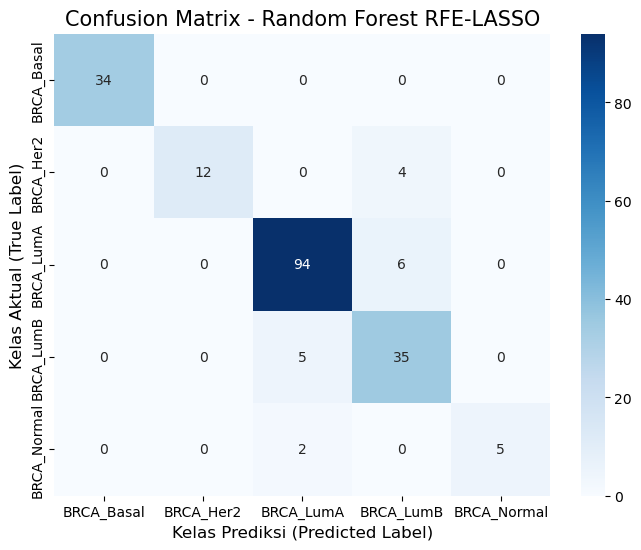

In [41]:
print("\n--- Menampilkan Confusion Matrix untuk RF Selected ---")

# Get prediksi dari model
y_pred_rf_selected = best_rf_model_selected.predict(X_test_for_evaluation)

# Panggil fungsi plot_confusion_matrix
plot_confusion_matrix(y_test, 
                      y_pred_rf_selected, 
                      le.classes_, 
                      'Confusion Matrix - Random Forest RFE-LASSO')

### SVM dengan Seleksi Fitur + SMOTE

In [ ]:
if X_train_smote_selected.shape[1] > 0:
    # Parameter
    svm_params_selected = {
        'C': [2, 5, 10, 50, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4] # Hanya untuk kernel 'poly'
    }
    
    # Best Params
    # svm_params_selected = {
    #     'C': [2],
    #     'kernel': ['linear'],
    #     'gamma': ['scale'],
    #     'degree': [2]
    # }
    
    svm_model_selected = SVC(probability=True, random_state=42, class_weight='balanced')

    # Run GridSearchCV dan evaluasi untuk SVM dengan fitur terpilih
    print("\n--- SVM (Selected Features + SMOTE) ---")
    best_svm_model_selected, acc_svm_metric_selected, prec_svm_metric_selected, rec_svm_metric_selected, f1_svm_metric_selected, roc_auc_svm_metric_selected, cv_results_svm_selected= run_grid_search_and_evaluate(
        svm_model_selected, svm_params_selected,
        X_train_smote_selected, y_train_smote_selected,
        X_test_selected, y_test,
        "SVM (Selected Features, SMOTE)", le
    )
else:
    print("Tidak ada fitur yang terpilih untuk SVM (Selected Features), evaluasi dilewati.")
    # Inisialisasi metrik jika evaluasi dilewati
    acc_svm_metric_selected, prec_svm_metric_selected, rec_svm_metric_selected, f1_svm_metric_selected, roc_auc_svm_metric_selected, cv_results_svm_selected = 0,0,0,0,0


--- SVM (Selected Features + SMOTE) ---
SVM (Selected Features, SMOTE) GridSearchCV training time: 16.43 seconds

Best Parameters for SVM (Selected Features, SMOTE): {'C': 2, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

=== Evaluation on Test Set for SVM (Selected Features, SMOTE) === 
Accuracy: 0.8426
Precision (Macro): 0.8246
Recall (Macro): 0.7327
F1-score (Macro): 0.7667
ROC AUC (Macro, OvR): 0.9381

Classification Report (Test Set):
              precision    recall  f1-score   support

  BRCA_Basal       0.97      1.00      0.99        34
   BRCA_Her2       0.83      0.62      0.71        16
   BRCA_LumA       0.85      0.91      0.88       100
   BRCA_LumB       0.72      0.70      0.71        40
 BRCA_Normal       0.75      0.43      0.55         7

    accuracy                           0.84       197
   macro avg       0.82      0.73      0.77       197
weighted avg       0.84      0.84      0.84       197




--- Menampilkan Confusion Matrix untuk SVM Selected ---


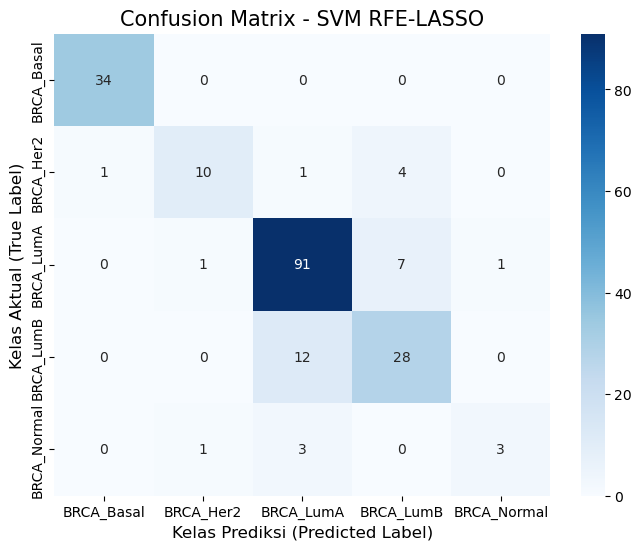

In [74]:
print("\n--- Menampilkan Confusion Matrix untuk SVM Selected ---")

# Get prediksi dari model
y_pred_rf_selected = best_svm_model_selected.predict(X_test_for_evaluation)

# Panggil fungsi plot_confusion_matrix
plot_confusion_matrix(y_test, 
                      y_pred_rf_selected, 
                      le.classes_, 
                      'Confusion Matrix - SVM RFE-LASSO')

# Tabel Pembanding

In [75]:
results_list_of_dicts = []

# Model tanpa seleksi fitur
if 'f1_rf_metric_full' in globals():
    results_list_of_dicts.append({
        'Model': 'Random Forest (Full Scaled Feat, SMOTE)',
        'Accuracy': acc_rf_metric_full, 'Precision': prec_rf_metric_full,
        'Recall': rec_rf_metric_full, 'F1-score': f1_rf_metric_full,
        'ROC AUC': roc_auc_rf_metric_full
    })
if 'f1_svm_metric_full' in globals():
    results_list_of_dicts.append({
        'Model': 'SVM (Full Scaled Feat, SMOTE)',
        'Accuracy': acc_svm_metric_full, 'Precision': prec_svm_metric_full,
        'Recall': rec_svm_metric_full, 'F1-score': f1_svm_metric_full,
        'ROC AUC': roc_auc_svm_metric_full
    })

# Model dengan seleksi fitur
if 'f1_rf_metric_selected' in globals() and X_train_smote_selected.shape[1] > 0 :
     results_list_of_dicts.append({
        'Model': 'Random Forest (Selected Feat, SMOTE)',
        'Accuracy': acc_rf_metric_selected, 'Precision': prec_rf_metric_selected,
        'Recall': rec_rf_metric_selected, 'F1-score': f1_rf_metric_selected,
        'ROC AUC': roc_auc_rf_metric_selected
    })
if 'f1_svm_metric_selected' in globals() and X_train_smote_selected.shape[1] > 0 :
    results_list_of_dicts.append({
        'Model': 'SVM (Selected Feat, SMOTE)',
        'Accuracy': acc_svm_metric_selected, 'Precision': prec_svm_metric_selected,
        'Recall': rec_svm_metric_selected, 'F1-score': f1_svm_metric_selected,
        'ROC AUC': roc_auc_svm_metric_selected
    })

if results_list_of_dicts:
    results_summary_df = pd.DataFrame(results_list_of_dicts)
    print("\n=== Perbandingan Kinerja Model (Test Set) ===")
    print(results_summary_df.to_string(index=False))
else:
    print("Tidak ada hasil model untuk ditampilkan dalam tabel perbandingan.")


=== Perbandingan Kinerja Model (Test Set) ===
                                  Model  Accuracy  Precision   Recall  F1-score  ROC AUC
Random Forest (Full Scaled Feat, SMOTE)  0.893401   0.916810 0.768143  0.800372 0.984357
          SVM (Full Scaled Feat, SMOTE)  0.878173   0.870516 0.804786  0.832331 0.972968
   Random Forest (Selected Feat, SMOTE)  0.913706   0.941694 0.855857  0.889866 0.984520
             SVM (Selected Feat, SMOTE)  0.842640   0.824636 0.732714  0.766667 0.938107


In [76]:
# Simpan Model

import joblib
joblib.dump(best_rf_model_full, 'best_rf_model_full.pkl')
joblib.dump(best_svm_model_full, 'best_svm_model_full.pkl')
joblib.dump(best_rf_model_selected, 'best_rf_model_selected.pkl')
joblib.dump(best_svm_model_selected, 'best_svm_model_selected.pkl')

['best_svm_model_selected.pkl']